In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
dataset = pd.read_csv("train.csv")
dataset.head()
#dataset.count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

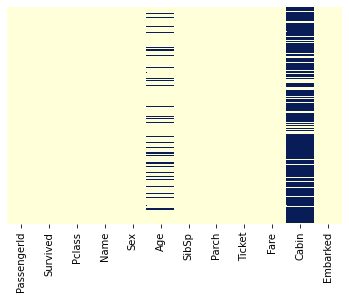

In [86]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We’ll probably drop this

**Data Imputation on Age Column**

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passenger
However, we can be smarter about this and check the average age by passenger class.

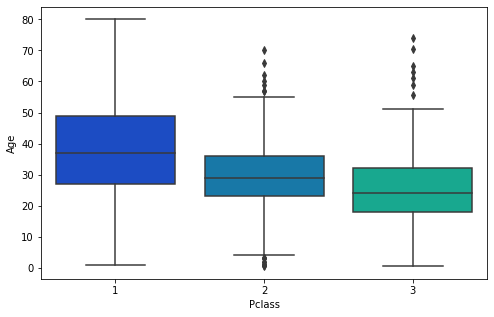

In [87]:
#box plot with p-class on x-axis and age on y-axis
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass",y="Age",data = dataset, palette = "winter")


We can see the **wealthier** passengers in the higher classes tend to be **older**, which makes sense. **We’ll use these average age values to impute based on Pclass for Age.**

In [88]:
# Calculation Age mean based on passenger class
ageMean = []
for i in range(1,4):
    m = int(dataset[(dataset['Pclass'] == i)]['Age'].dropna().mean())
    ageMean.append(m)    
print (ageMean)

[38, 29, 25]


In [89]:
def ageMean_fill(cols, avg):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return avg[0]

        elif Pclass == 2:
            return avg[1]

        else:
            return avg[2]

    else:
        return Age

In [90]:
# Applying the above defined function on the Age column
dataset['Age'] = dataset[['Age','Pclass']].apply(ageMean_fill, avg=ageMean,axis=1)

Now let’s check that heatmap again!

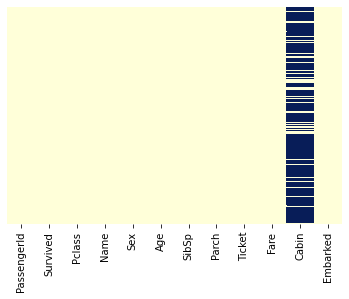

In [91]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

Now let us go ahead and drop the Cabin column due to too many missing values

In [92]:
dataset.drop('Cabin',axis=1,inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


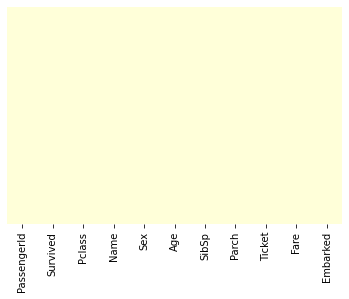

In [93]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

YaY...! No missing values in dataset anymore

**Converting Categorical Features**

We’ll need to convert categorical features such as Sex, Embarked to dummy variables using pandas!
Otherwise, our machine learning algorithm won’t be able to directly take in those features as inputs.

In [94]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [95]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [96]:
#Dropping features which are irrelevant or difficult to pass as input to the model
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dataset.drop(['PassengerId'],axis=1,inplace=True)

#Concatinating new feature columns into original data frame
dataset = pd.concat([dataset,sex,embark],axis=1)

dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


_Now our data is ready for our model!_


**Training Model**

In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
x = dataset.drop('Survived',axis=1)
y = dataset['Survived']

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [103]:
#Let’s use Logistic Regression to train the model
#create an instance and fit the model
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

C:\Users\7000020479\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predictions**


**Let's first predict on the test set created from training data.**

In [108]:
train_pred = logReg.predict(x_test)

**Model Evaluation**

**We can check precision, recall, f1-score using classification report and also see how accurate is our model for predictions:**

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



**We got 78% accuracy which is not bad at all...!**

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,train_pred)

array([[135,  19],
       [ 37,  77]], dtype=int64)

**From our confusion matrix we conclude that:**

True positive: 135(We predicted a positive result and it was positive)

True negative: 77(We predicted a negative result and it was negative)

False positive: 19(We predicted a positive result and it was negative)

False negative: 37(We predicted a negative result and it was positive)

Accuracy = (TP+TN)/total

Accuracy = (135+77)/268 ~ 79%

Error Rate = (FP+FN)/total

Error rate = (19+37)/268 ~21%

**Now let's import the test csv file and clean the data.**

In [111]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


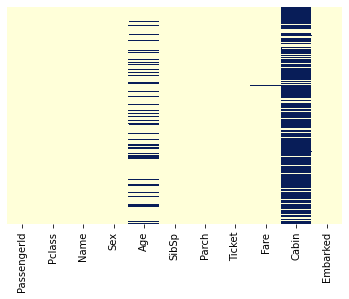

In [112]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

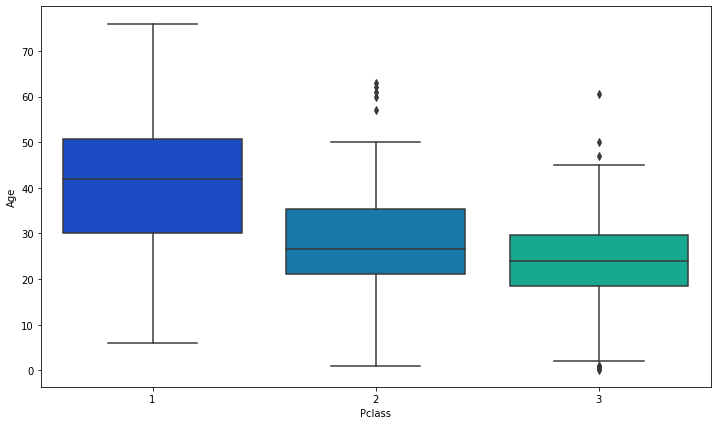

In [113]:
# Let's visualize distribution on age groups among passenger classes
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test_data,palette='winter')

In [114]:
ageMean_test = []
for i in range(1,4):
    m = int(test_data[(test_data['Pclass'] == i)]['Age'].dropna().mean())
    ageMean_test.append(m)    
print (ageMean_test)

[40, 28, 24]


In [115]:
# Applying the same function on the Age column in test dataset
test_data['Age'] = test_data[['Age','Pclass']].apply(ageMean_fill, avg=ageMean_test,axis=1)

In [116]:
test_data.drop('Cabin', axis = 1,inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

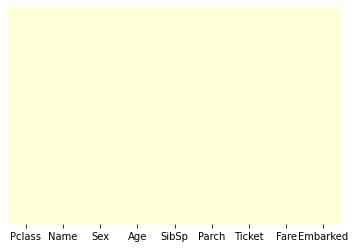

In [117]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [118]:
# Converting Categorical Features
sex = pd.get_dummies(test_data['Sex'],drop_first=True)
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)

In [119]:
#Concatinating new feature columns into original data frame
test_data = pd.concat([test_data,sex,embark],axis=1)

#Dropping features which are irrelevant or difficult to pass as input to the model
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [120]:
test_data.dropna(inplace=True)

**Prediction on Test Data**

In [121]:
survived_pred = logReg.predict(test_data)

In [122]:
test_data['prediction'] = survived_pred
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,prediction
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1


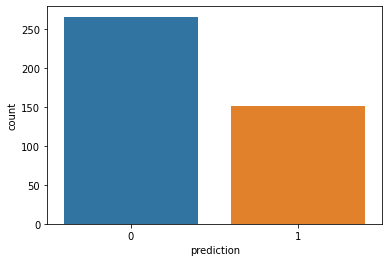

In [123]:
sns.countplot(x='prediction',data=test_data)

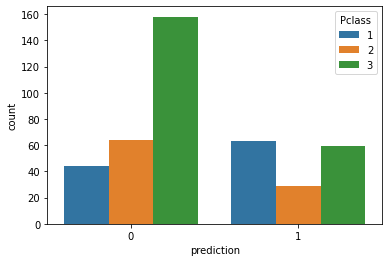

In [125]:
#prediction based on Pclass
sns.countplot(x='prediction', data=test_data, hue='Pclass')

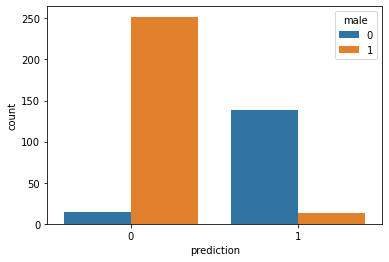

In [128]:
#prediction based on Gender
sns.countplot(x='prediction', data=test_data, hue='male')

_**THANK YOU...!**_